# EDA Project, Muesli Company

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl

### 1. Reading in of the Excel file

In [380]:
# Reading in .xlsx and create Dataframe for each sheet

df_orders = pd.read_excel('/Users/selina/neuefische/da-EDA_project/data/Muesli Project raw data.xlsx', sheet_name=0)
df_campaign = pd.read_excel('/Users/selina/neuefische/da-EDA_project/data/Muesli Project raw data.xlsx', sheet_name=1)
df_process = pd.read_excel('/Users/selina/neuefische/da-EDA_project/data/Muesli Project raw data.xlsx', sheet_name=2)
df_intern = pd.read_excel('/Users/selina/neuefische/da-EDA_project/data/Muesli Project raw data.xlsx', sheet_name=3)


In [381]:
#Dropping first row of df_orders, which is empty & renew Index

header = df_orders.iloc[0]
df_orders.drop([0], axis =0, inplace=True)
df_orders.reset_index(drop=True)
df_orders.columns = header

df_orders.head(2)

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
1,27,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0,11.7741
2,45,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0,19.7714


### 2. First look into Dataframe

In [382]:
display(df_orders.shape)
display(df_campaign.shape)
display(df_process.shape)
display(df_intern.shape)

(9994, 19)

(333, 3)

(5899, 5)

(290, 3)

In [383]:
df_orders.info()
df_orders.columns

#checking for null-values: only in 'postal codes' which we might drop later. 'Order Date' is not yet in datetime-format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           9994 non-null   object
 1   Order ID        9994 non-null   object
 2   Order Date      9994 non-null   object
 3   Ship Mode       9994 non-null   object
 4   Customer ID     9994 non-null   object
 5   Customer Name   9994 non-null   object
 6   Origin Channel  9994 non-null   object
 7   Country/Region  9994 non-null   object
 8   City            9994 non-null   object
 9   State           9994 non-null   object
 10  Postal Code     9983 non-null   object
 11  Region          9994 non-null   object
 12  Category        9994 non-null   object
 13  Sub-Category    9994 non-null   object
 14  Product ID      9994 non-null   object
 15  Sales           9994 non-null   object
 16  Quantity        9994 non-null   object
 17  Discount        9994 non-null   object
 18  Profit  

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object', name=0)

In [384]:
df_campaign.info()
df_campaign.columns

# Dates already in datetime-format, no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           333 non-null    object        
 1   Arrival Scan Date  333 non-null    datetime64[ns]
 2   Customer Name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')

In [385]:
df_process.info()
df_process.columns

# Dates already in datetime-format, no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              5899 non-null   int64         
 1   Order ID            5899 non-null   object        
 2   Order Date          5899 non-null   datetime64[ns]
 3   On Truck Scan Date  5899 non-null   datetime64[ns]
 4   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')

In [386]:
df_intern.info()
df_intern.columns

# Ready to ship Date = pickup Date 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            290 non-null    object        
 1   Ready to Ship Date  290 non-null    datetime64[ns]
 2   Pickup Date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')

In [387]:
df_orders['Ship Mode'].unique()

# 'Ship Mode' in df_orders != Express/Standard Ship Mode, but a different Value: 'Second Class', 'First Class', 'Standard Class'
# We will not work with that values, but merge our Dataframes for using Express/Standard Ship Mode.

array(['Second Class', 'First Class', 'Standard Class'], dtype=object)

In [388]:
df_orders.head()

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
1,27,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0,11.7741
2,45,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0,19.7714
3,48,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45,3,0,4.95
4,60,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30,2,0,3.3
5,63,CA-2018-135545,2018-11-24 00:00:00,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0,6.1512


In [389]:
df_campaign.head()

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [390]:
df_process.head()

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


## 3. Cleaning Process
## 3.1 Column cleaning

- drop duplicated rows, unify Dataframe & replace headers

In [391]:
# replacing space with underscore and lowercasing in df_orders. 

df_orders2 = df_orders.copy()
col2 = df_orders2.columns 
cols = [col2.replace(' ', '_') for col2 in col2] 

df_orders.columns = cols 

df_orders.columns = df_orders.columns.str.lower() 

df_orders.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [392]:
# replacing space with underscore and lowercasing in df_campaign. 

df_campaign2 = df_campaign.copy() 
col2 = df_campaign2.columns 
cols = [col2.replace(' ', '_') for col2 in col2] 

df_campaign.columns = cols 

df_campaign.columns = df_campaign.columns.str.lower() 

df_campaign.columns

Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')

In [393]:
# replacing space with underscore and lowercasing in df_process. 

df_process2 = df_process.copy() 
col2 = df_process2.columns 
cols = [col2.replace(' ', '_') for col2 in col2] 

df_process.columns = cols

df_process.columns = df_process.columns.str.lower() 

df_process.columns

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [394]:
# replacing space with underscore and lowercasing in df_intern. 

df_intern2 = df_intern.copy() 
col2 = df_intern2.columns 
cols = [col2.replace(' ', '_') for col2 in col2] 

df_intern.columns = cols 

df_intern.columns = df_intern.columns.str.lower() 

df_intern.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [395]:
# replacing backslash with underscore in df_orders.

df_orders2 = df_orders.copy()
col2 = df_orders2.columns 
cols = [col2.replace('/', '_') for col2 in col2]
df_orders.columns = cols

df_orders.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [396]:
# replacing dash with underscore in df_orders.

df_orders2 = df_orders.copy()
col2 = df_orders2.columns 
cols = [col2.replace('-', '_') for col2 in col2]
df_orders.columns = cols

df_orders.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## 3.2 Checking Duplicates

- Order ID can be different products sent in one Order, appears then in different columns. For calculation timeframes, delivery process & warehouse process drop them.
- ! Information about Sales/Profit gets lost.

In [397]:
df_orders['order_id'].duplicated().value_counts()


False    5009
True     4985
Name: order_id, dtype: int64

In [398]:
# new DF without duplicates: df_orders_unique // old DF with duplicates: df_orders

df_orders_unique = df_orders[~df_orders['order_id'].duplicated()]
df_orders_unique.shape

(5009, 19)

In [399]:
df_campaign['order_id'].duplicated().value_counts()

False    333
Name: order_id, dtype: int64

In [400]:
df_process['order_id'].duplicated().value_counts()

False    3002
True     2897
Name: order_id, dtype: int64

In [401]:
# new DF without duplicates: df_process_unique // old DF with duplicates: df_process

df_process_unique = df_process[~df_process['order_id'].duplicated()]
df_process_unique.shape

(3002, 5)

In [402]:
df_intern['order_id'].duplicated().value_counts()

False    204
True      86
Name: order_id, dtype: int64

In [403]:
# new DF without duplicates: df_intern_unique // old DF with duplicates: df_intern
# ! in df_intern nearly 1/3 values are duplicates

df_intern_unique = df_intern[~df_intern['order_id'].duplicated()]
df_intern_unique.shape

(204, 3)

## 3.3 Changing to datetime format

In [404]:
# Changing to datetime format in df_orders_unique

df_orders_unique['order_date'] = pd.to_datetime(df_orders_unique['order_date'], format='%Y-%m-%d')


/var/folders/5_/7xzpd6d945j4_28t7806tw4h0000gn/T/ipykernel_37928/774215115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_unique['order_date'] = pd.to_datetime(df_orders_unique['order_date'], format='%Y-%m-%d')


In [405]:
# Creating a new column containing the weekday of each order (mon = 0, sun = 6) in df_orders_unique.

df_orders_unique["order_weekday"] = df_orders_unique["order_date"].dt.dayofweek

/var/folders/5_/7xzpd6d945j4_28t7806tw4h0000gn/T/ipykernel_37928/4108754852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_unique["order_weekday"] = df_orders_unique["order_date"].dt.dayofweek


In [406]:
# Creating a new column containing the weekday of each order (mon = 0, sun = 6) in df_process_unique.

df_process_unique["order_weekday"] = df_process_unique["order_date"].dt.dayofweek

/var/folders/5_/7xzpd6d945j4_28t7806tw4h0000gn/T/ipykernel_37928/3614123261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process_unique["order_weekday"] = df_process_unique["order_date"].dt.dayofweek


In [407]:
df_orders_unique.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_weekday
1,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0,11.7741,2
2,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0,19.7714,0
3,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45,3,0,4.95,3
4,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30,2,0,3.3,0
5,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0,6.1512,5


In [408]:
df_orders_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 1 to 9989
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5009 non-null   object        
 1   order_id        5009 non-null   object        
 2   order_date      5009 non-null   datetime64[ns]
 3   ship_mode       5009 non-null   object        
 4   customer_id     5009 non-null   object        
 5   customer_name   5009 non-null   object        
 6   origin_channel  5009 non-null   object        
 7   country_region  5009 non-null   object        
 8   city            5009 non-null   object        
 9   state           5009 non-null   object        
 10  postal_code     5003 non-null   object        
 11  region          5009 non-null   object        
 12  category        5009 non-null   object        
 13  sub_category    5009 non-null   object        
 14  product_id      5009 non-null   object        
 15  sale

In [409]:
df_process.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [410]:
df_campaign.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [411]:
df_orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
1,27,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0,11.7741
2,45,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0,19.7714
3,48,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45,3,0,4.95
4,60,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30,2,0,3.3
5,63,CA-2018-135545,2018-11-24 00:00:00,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0,6.1512


## 4. Having a closer look in the delivery process
### 4.1 Reevaluation of the delivery process


Calculating 3 timeframes for maximal transparency in the delivers process: 
- order date to ready to ship date 
- order date to on truck date
- order date to arrival scan date

#### Timeframe 1: Order Date -> Ready to ship Date

In [412]:
# merging dataframe to make comparsion between order date & ready to ship date possible. 

df_process_intern = pd.merge(df_process_unique, df_intern_unique, on='order_id', how='inner')
df_process_intern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              204 non-null    int64         
 1   order_id            204 non-null    object        
 2   order_date          204 non-null    datetime64[ns]
 3   on_truck_scan_date  204 non-null    datetime64[ns]
 4   ship_mode           204 non-null    object        
 5   order_weekday       204 non-null    int64         
 6   ready_to_ship_date  204 non-null    datetime64[ns]
 7   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](4), int64(2), object(2)
memory usage: 14.3+ KB


In [413]:
# adding difference in days as a new column for easier calculation of the difference in days

df_process_intern['difference_order_readytoship']=(df_process_intern["ready_to_ship_date"]-df_process_intern["order_date"]).dt.days

In [414]:
df_process_intern.head(10)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_weekday,ready_to_ship_date,pickup_date,difference_order_readytoship
0,3416,CA-2019-116540,2019-09-02,2019-09-03,Express,0,2019-09-02,2019-09-03,0
1,6937,CA-2019-129847,2019-09-02,2019-09-04,Express,0,2019-09-04,2019-09-04,2
2,9929,CA-2019-129630,2019-09-04,2019-09-04,Express,2,2019-09-04,2019-09-04,0
3,870,CA-2019-158099,2019-09-03,2019-09-06,Express,1,2019-09-05,2019-09-06,2
4,2283,CA-2019-132143,2019-09-03,2019-09-06,Express,1,2019-09-05,2019-09-06,2
5,5354,US-2019-101616,2019-09-03,2019-09-06,Express,1,2019-09-06,2019-09-06,3
6,9069,CA-2019-106278,2019-09-02,2019-09-06,Standard Processing,0,2019-09-05,2019-09-06,3
7,4514,CA-2019-145240,2019-09-06,2019-09-09,Express,4,2019-09-09,2019-09-09,3
8,1408,CA-2019-130407,2019-09-02,2019-09-09,Standard Processing,0,2019-09-06,2019-09-09,4
9,7078,CA-2019-106950,2019-09-02,2019-09-09,Standard Processing,0,2019-09-06,2019-09-09,4


#### Timeframe 2: Order date -> on truck date

In [415]:
# adding difference in days as a new column for easier calculation of the difference in days

df_process_unique['difference_in_days']=(df_process_unique["on_truck_scan_date"]-df_process_unique["order_date"]).dt.days

df_process_unique.head(20)

/var/folders/5_/7xzpd6d945j4_28t7806tw4h0000gn/T/ipykernel_37928/681322176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process_unique['difference_in_days']=(df_process_unique["on_truck_scan_date"]-df_process_unique["order_date"]).dt.days


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_weekday,difference_in_days
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express,3,4
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,2,7
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,3,6
6,9494,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,3,6
8,5868,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,4,5
10,863,CA-2019-134474,2019-01-05,2019-01-11,Standard Processing,5,6
13,2898,US-2019-164630,2019-01-04,2019-01-11,Standard Processing,4,7
14,8031,CA-2019-158806,2019-01-07,2019-01-14,Standard Processing,0,7
16,3236,CA-2019-140746,2019-01-15,2019-01-16,Express,1,1
17,3702,CA-2019-126543,2019-01-09,2019-01-16,Standard Processing,2,7


#### Timeframe 3: Order Date -> Arrival Scan Date

In [416]:
df_orders_unique.columns


Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'order_weekday'],
      dtype='object')

In [417]:
droplist =['postal_code', 'city', 'state', 'index', 'region', 'sub_category', ]

# dropped some columns for a better overview

In [418]:
# merging to make comparsion between order date and arrival scan date possible

df_orders_campaign = pd.merge(df_orders_unique, df_campaign, on='order_id', how='inner')
df_orders_campaign.shape

(333, 22)

In [419]:
df_orders_campaign.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country_region,city,state,...,category,sub_category,product_id,sales,quantity,discount,profit,order_weekday,arrival_scan_date,customer_name_y
0,252,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0,636.0003,2,2019-09-23,Kelly Collister
1,325,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0,34.9965,1,2019-05-06,Grace Kelly
2,494,CA-2019-169166,2019-05-09,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,...,Special Projects Muesil,Gluten Free,TEC-AC-10000991,93.98,2,0,13.1572,3,2019-05-20,Sonia Sunley
3,734,CA-2020-131954,2020-01-21,Standard Class,DS-13030,Darrin Sayre,Facebook,United States,Seattle,Washington,...,Special Projects Muesil,Gluten Free,TEC-AC-10003610,179.97,3,0,86.3856,1,2020-02-03,Darrin Sayre
4,1042,CA-2019-102981,2019-09-06,Second Class,MO-17500,Mary O'Rourke,Email,United States,New York City,New York,...,Special Projects Muesil,Gluten Free,TEC-AC-10004761,31.86,2,0,11.151,4,2019-09-16,Mary O'Rourke


In [420]:
# add difference in days as a new column

df_orders_campaign['difference_in_days']=(df_orders_campaign["arrival_scan_date"]-df_orders_campaign["order_date"]).dt.days

In [421]:
df_orders_campaign.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,order_weekday,arrival_scan_date,customer_name_y,difference_in_days
0,252,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,Gluten Free,TEC-AC-10003832,3347.37,13,0,636.0003,2,2019-09-23,Kelly Collister,12
1,325,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,Gluten Free,TEC-AC-10001908,99.99,1,0,34.9965,1,2019-05-06,Grace Kelly,13
2,494,CA-2019-169166,2019-05-09,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,...,Gluten Free,TEC-AC-10000991,93.98,2,0,13.1572,3,2019-05-20,Sonia Sunley,11
3,734,CA-2020-131954,2020-01-21,Standard Class,DS-13030,Darrin Sayre,Facebook,United States,Seattle,Washington,...,Gluten Free,TEC-AC-10003610,179.97,3,0,86.3856,1,2020-02-03,Darrin Sayre,13
4,1042,CA-2019-102981,2019-09-06,Second Class,MO-17500,Mary O'Rourke,Email,United States,New York City,New York,...,Gluten Free,TEC-AC-10004761,31.86,2,0,11.151,4,2019-09-16,Mary O'Rourke,10


In [422]:
df_orders_campaign.describe()

# Overall Stats for Order to Arrival Date:

,order_weekday,difference_in_days
count,333.000000,333.000000
mean,2.762763,10.834835
std,2.052223,2.862257
min,0.000000,3.000000
25%,1.000000,9.000000
50%,3.000000,11.000000
75%,4.000000,13.000000
max,6.000000,17.000000


### 4.2 Reevaluation of the delivery process of Express vs. Standard shipping

Calculation different timeframes for Express and Standard Shipping

#### Order Date to Ready to Ship Date Express vs. Standard Shipping

In [423]:
# Overall Stats for the different shipping modes 

df_process_intern.groupby('ship_mode').difference_order_readytoship.describe()

# Express: Avg 2.03 Days/Standard: Avg 4.92 Days

,count,mean,std,min,25%,50%,75%,max
ship_mode,,,,,,,,
Express,53.0,2.037736,1.686625,0.0,0.0,2.0,3.0,5.0
Standard Processing,151.0,4.927152,1.442680,2.0,4.0,5.0,6.0,8.0


#### Order Date to On Truck Date Express vs. Standard Shipping

In [424]:
# Overall Stats for the different shipping modes 

df_process_unique.groupby('ship_mode').difference_in_days.describe()

# Express: Avg 2.6 Days/Standard: Avg 7 Days

,count,mean,std,min,25%,50%,75%,max
ship_mode,,,,,,,,
Express,662.0,2.619335,1.607505,0.0,1.0,3.0,4.0,6.0
Standard Processing,2340.0,7.091880,1.649653,2.0,6.0,7.0,8.0,12.0


In [425]:
df_process_unique.describe()

,row_id,order_weekday,difference_in_days
count,3002.000000,3002.000000,3002.000000
mean,5044.348767,2.521652,6.105596
std,2879.158020,1.860791,2.475843
min,1.000000,0.000000,0.000000
25%,2567.500000,1.000000,5.000000
50%,5067.000000,2.000000,7.000000
75%,7547.250000,4.000000,8.000000
max,9994.000000,6.000000,12.000000


#### Order Date to Arrival Date Express vs. Standard shipping

In [426]:
# merging to make comparsion of standard & express shipping for timeframe: order date to arrival date possible

df_process_campaign = pd.merge(df_process_unique, df_campaign, on='order_id', how='inner')

In [427]:
# add difference in days as a new column 

df_process_campaign['difference_in_days']=(df_process_campaign["arrival_scan_date"]-df_process_campaign["order_date"]).dt.days

In [428]:
df_process_campaign.columns


Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode',
       'order_weekday', 'difference_in_days', 'arrival_scan_date',
       'customer_name'],
      dtype='object')

In [429]:
df_process_campaign.head(10)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_weekday,difference_in_days,arrival_scan_date,customer_name
0,3235,CA-2019-138933,2019-04-24,2019-04-29,Express,2,9,2019-05-03,Jack Lebron
1,7108,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,4,14,2019-05-03,Kunst Miller
2,1037,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,0,14,2019-05-06,Ed Ludwig
3,1180,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,2,12,2019-05-06,Cathy Armstrong
4,332,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,3,12,2019-05-07,John Lucas
5,463,CA-2019-109869,2019-04-22,2019-05-01,Standard Processing,0,15,2019-05-07,Tanja Norvell
6,1577,CA-2019-109057,2019-04-22,2019-05-01,Standard Processing,0,15,2019-05-07,Tonja Turnell
7,9503,CA-2019-101329,2019-04-22,2019-05-01,Standard Processing,0,16,2019-05-08,Michael Moore
8,324,CA-2019-162138,2019-04-23,2019-05-01,Standard Processing,1,13,2019-05-06,Grace Kelly
9,359,CA-2019-130001,2019-04-23,2019-05-01,Standard Processing,1,10,2019-05-03,Heather Kirkland


In [430]:
# Overall Stats for the different shipping modes 

df_process_campaign.groupby('ship_mode').difference_in_days.mean()

# Express: Avg 7 Days/Standard: Avg 12 Days

ship_mode
Express                 7.053333
Standard Processing    11.934109
Name: difference_in_days, dtype: float64

In [431]:
# maximal duration of the delivery process

df_process_campaign.groupby('ship_mode').difference_in_days.max()

ship_mode
Express                13
Standard Processing    17
Name: difference_in_days, dtype: int64

In [432]:
# minimal duration of the delivery process

df_process_campaign.groupby('ship_mode').difference_in_days.min()

ship_mode
Express                3
Standard Processing    6
Name: difference_in_days, dtype: int64

#### Calculation of percentage of each shipping mode

([<matplotlib.patches.Wedge at 0x176def1f0>,
 [Text(0.7011663855493698, 0.8475645696792855, 'Express Shipping'),
  Text(-0.7011663061946448, -0.8475646353272167, 'Standard Shipping')])

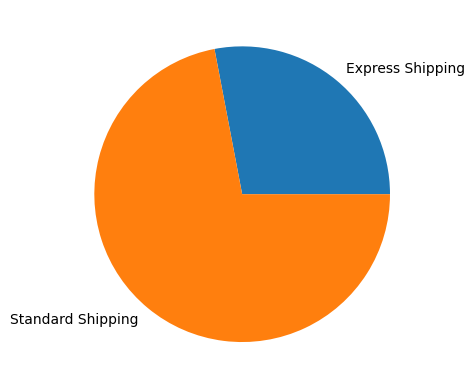

In [433]:
# 28% of Orders are shipped via Express mode. 

fig, ax = plt.subplots()
ax.pie([28, 72], labels=['Express Shipping','Standard Shipping'])

#### Calculation of profitrange for each shipping mode

In [434]:
# merging df_orders as a dataframe with all orders & profit ranges

df_profit_shipmode = pd.merge(df_orders, df_process_campaign, on='order_id', how='inner')


In [435]:
df_profit_shipmode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               668 non-null    object        
 1   order_id            668 non-null    object        
 2   order_date_x        668 non-null    object        
 3   ship_mode_x         668 non-null    object        
 4   customer_id         668 non-null    object        
 5   customer_name_x     668 non-null    object        
 6   origin_channel      668 non-null    object        
 7   country_region      668 non-null    object        
 8   city                668 non-null    object        
 9   state               668 non-null    object        
 10  postal_code         668 non-null    object        
 11  region              668 non-null    object        
 12  category            668 non-null    object        
 13  sub_category        668 non-null    object        

In [436]:
# overall profitrange for each shipping mode: Standard Shipping has a much bigger profit range. 
# !! Not possible to evaluate without further data.

df_profit_shipmode.groupby('ship_mode_y').profit.mean()

ship_mode_y
Express                13.285384
Standard Processing    46.174019
Name: profit, dtype: float64

#### Calculation of possible difference in delivery duration by days of the weeks

In [437]:
df_orders_campaign['difference_in_days']=(df_orders_campaign["arrival_scan_date"]-df_orders_campaign["order_date"]).dt.days

In [438]:
df_orders_campaign.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,order_weekday,arrival_scan_date,customer_name_y,difference_in_days
0,252,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,Gluten Free,TEC-AC-10003832,3347.37,13,0,636.0003,2,2019-09-23,Kelly Collister,12
1,325,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,Gluten Free,TEC-AC-10001908,99.99,1,0,34.9965,1,2019-05-06,Grace Kelly,13
2,494,CA-2019-169166,2019-05-09,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,...,Gluten Free,TEC-AC-10000991,93.98,2,0,13.1572,3,2019-05-20,Sonia Sunley,11
3,734,CA-2020-131954,2020-01-21,Standard Class,DS-13030,Darrin Sayre,Facebook,United States,Seattle,Washington,...,Gluten Free,TEC-AC-10003610,179.97,3,0,86.3856,1,2020-02-03,Darrin Sayre,13
4,1042,CA-2019-102981,2019-09-06,Second Class,MO-17500,Mary O'Rourke,Email,United States,New York City,New York,...,Gluten Free,TEC-AC-10004761,31.86,2,0,11.151,4,2019-09-16,Mary O'Rourke,10


In [439]:
# no difference in duration of delivery while ordering on different days of the week

df_orders_campaign.groupby('order_weekday').difference_in_days.mean()

order_weekday
0    11.075472
1    10.983051
2    11.204082
3    10.285714
4    10.243243
5     9.333333
6    11.227273
Name: difference_in_days, dtype: float64